In [38]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Compiling all Codes

In [39]:
subprocess.run(["g++", "-o", "main", "ND_ising_model.cpp", "ND_ising_system.cpp"], check=True)
subprocess.run(["g++", "-o", "sweep", "ND_sweep.cpp", "ND_ising_system.cpp"], check=True)

CompletedProcess(args=['g++', '-o', 'sweep', 'ND_sweep.cpp', 'ND_ising_system.cpp'], returncode=0)

Finding the critical point for 1D/2D

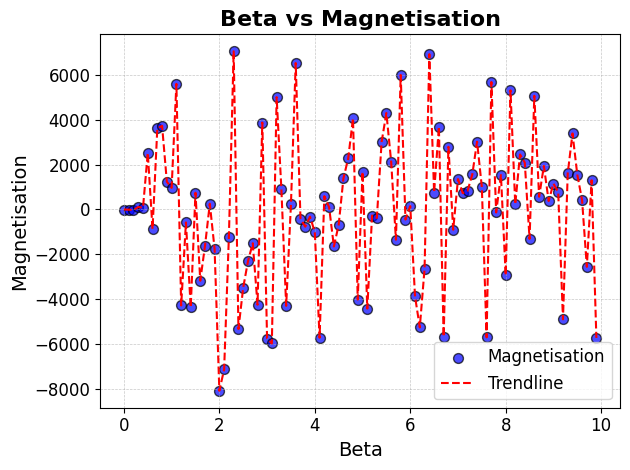

In [40]:
df_full = pd.DataFrame({"beta": [], "energies": [], "mags": []})

beta_values = []
energy_values = []
mag_values = []

for b in range(0, 100):
    subprocess.run(["./main", "100", "2", "5000", "1000", str(b * 0.1)], check=True)
    df = pd.read_csv("./data/output.csv")

    beta_values.append(b * 0.1)
    energy_values.append(df["energy_total"].values.tolist())  
    mag_values.append(df["magnetisation"].values.tolist()) 

df_full["beta"] = beta_values
df_full["energies"] = energy_values
df_full["mags"] = mag_values

# PLOTTING SECTION

plt.scatter(df_full["beta"], [np.array(x).mean() for x in df_full["mags"]],
            color='b', label="Magnetisation", s=50, alpha=0.7, edgecolors='k') 
plt.plot(df_full["beta"], [np.array(x).mean() for x in df_full["mags"]], color='r', linestyle='--', label="Trendline")
plt.title("Beta vs Magnetisation", fontsize=16, fontweight='bold')
plt.xlabel("Beta", fontsize=14)
plt.ylabel("Magnetisation", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("./plots/2d_beta_s_magnet.png", dpi=300)


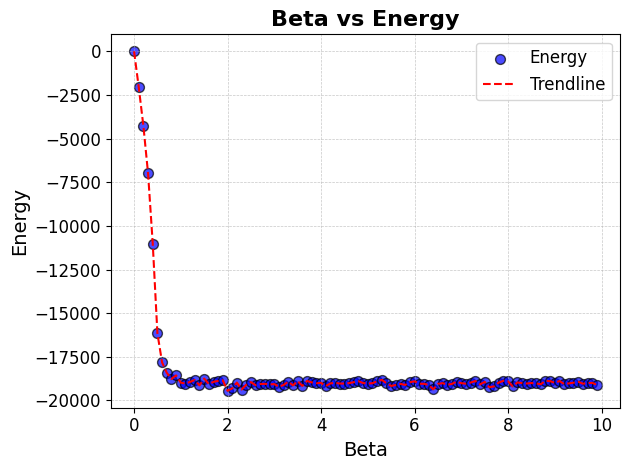

In [41]:
plt.scatter(df_full["beta"], [np.array(x).mean() for x in df_full["energies"]],
            color='b', label="Energy", s=50, alpha=0.7, edgecolors='k') 
plt.plot(df_full["beta"], [np.array(x).mean() for x in df_full["energies"]], color='r', linestyle='--', label="Trendline")
plt.title("Beta vs Energy", fontsize=16, fontweight='bold')
plt.xlabel("Beta", fontsize=14)
plt.ylabel("Energy", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("./plots/2d_beta_s_energy.png", dpi=300)

We see that the critical point is somewhere near 1.5-2.5, and the energy stabilises at 4. So we can test beta values from 0-4

Finding the number of sweeps required for 1D

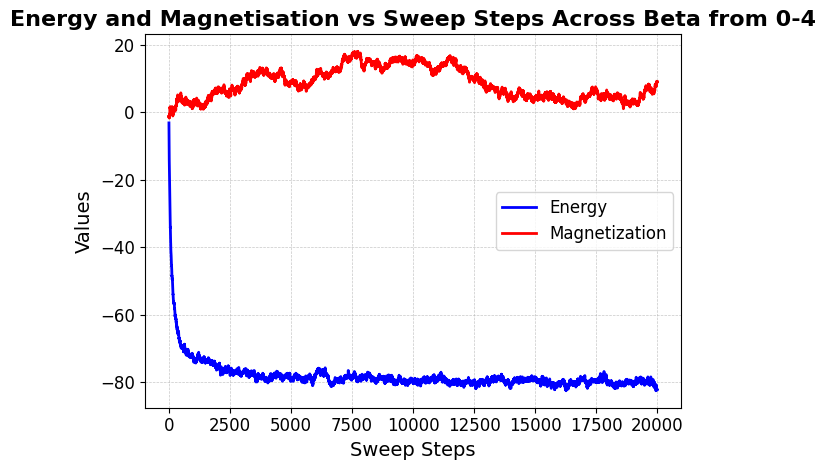

In [42]:
energies = []
magnets = []
for i in range(0, 40):
    subprocess.run(["./sweep", "100", "1", str(i*0.1), "20000"], check=True)
    df_sweep = pd.read_csv("./data/sweeps.csv")
    energies.append(df_sweep["energy"])
    magnets.append(df_sweep["magnetisation"])

# PLOTTING SECTION

plt.plot(np.arange(0, 20000), np.mean(energies, axis=0), color='b', label='Energy', linewidth=2)
plt.plot(np.arange(0, 20000), np.mean(magnets, axis=0), color='r', label='Magnetization', linewidth=2)
plt.title("Energy and Magnetisation vs Sweep Steps Across Beta from 0-4", fontsize=16, fontweight='bold')
plt.xlabel("Sweep Steps", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("./plots/2d_sweep.png", dpi=300)

We can see that around 5000 ish it starts to stabilise.

Analysing Distribution of Energy and Beta in Paramagnetic Phase (0-1)

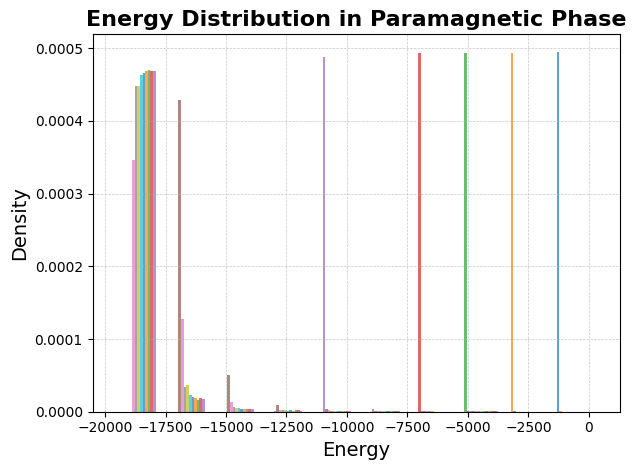

In [43]:
# PLOTTING SECTION

plt.hist(df_full[df_full["beta"] < 1.5]["energies"], alpha=0.7, density=True)
plt.title("Energy Distribution in Paramagnetic Phase", fontsize=16, fontweight='bold')
plt.xlabel("Energy", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("./plots/energy_dist_2d_para.png", dpi=300)

/tmp/ipykernel_47574/567556964.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


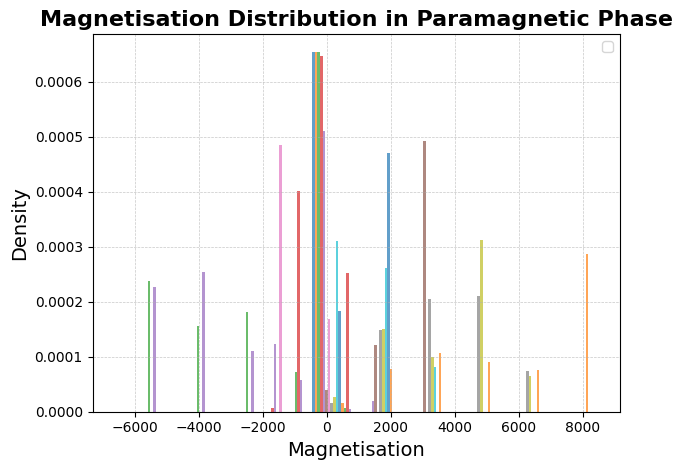

In [44]:
plt.hist(df_full[df_full["beta"] < 1.5]["mags"], alpha=0.7, density=True, bins=10)
plt.title("Magnetisation Distribution in Paramagnetic Phase", fontsize=16, fontweight='bold')
plt.xlabel("Magnetisation", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("./plots/mag_dist_2d_para.png", dpi=300)

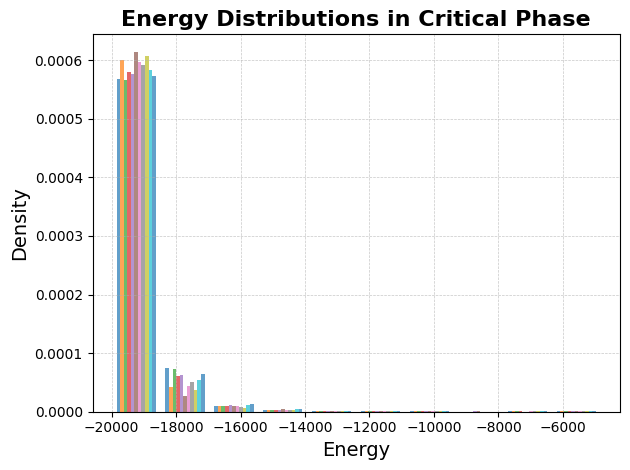

In [45]:
# PLOTTING SECTION

plt.hist(df_full[(df_full["beta"] >= 1.5) & (df_full["beta"] <= 2.5)]["energies"], alpha=0.7, density=True)
plt.title("Energy Distributions in Critical Phase", fontsize=16, fontweight='bold')
plt.xlabel("Energy", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("./plots/energy_dist_2d_crit.png", dpi=300)

/tmp/ipykernel_47574/2504858462.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


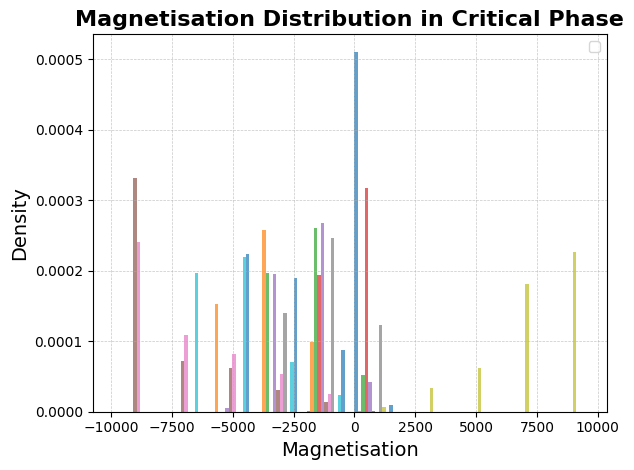

In [46]:
# PLOTTING SECTION

plt.hist(df_full[(df_full["beta"] >= 1.5) & (df_full["beta"] <= 2.5)]["mags"], alpha=0.7, density=True, bins=10)
plt.title("Magnetisation Distribution in Critical Phase", fontsize=16, fontweight='bold')
plt.xlabel("Magnetisation", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("./plots/mag_dist_2d_crit.png", dpi=300)

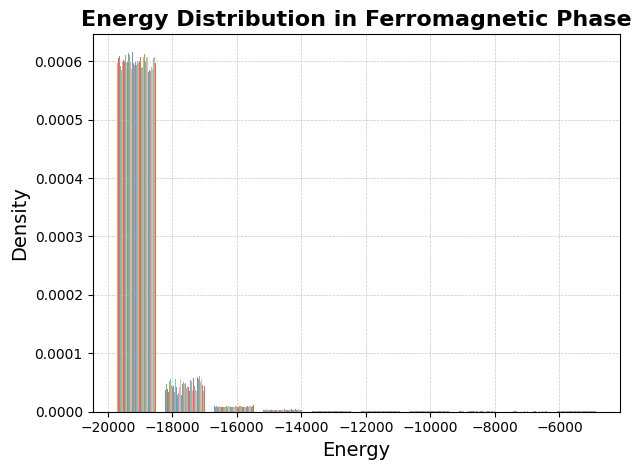

In [47]:
# PLOTTING SECTION

plt.hist(df_full[df_full["beta"] > 2.5]["energies"], alpha=0.7, density=True)
plt.title("Energy Distribution in Ferromagnetic Phase", fontsize=16, fontweight='bold')
plt.xlabel("Energy", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("./plots/energy_dist_2d_ferro.png", dpi=300)

/tmp/ipykernel_47574/1971121429.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


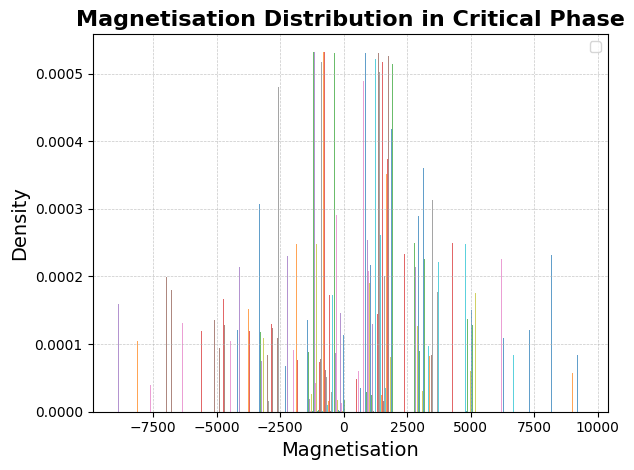

In [48]:
# PLOTTING SECTION

plt.hist(df_full[df_full["beta"] > 2.5]["mags"], alpha=0.7, density=True, bins=10)
plt.title("Magnetisation Distribution in Critical Phase", fontsize=16, fontweight='bold')
plt.xlabel("Magnetisation", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("./plots/mag_dist_2d_ferro.png", dpi=300)